In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['NGS-2016-reg-wk13-17.csv', 'video_footage-control.csv', 'NGS-2017-reg-wk1-6.csv', 'NGS-2017-reg-wk7-12.csv', 'player_punt_data.csv', 'NGS-2017-pre.csv', 'NGS-2017-reg-wk13-17.csv', 'NGS-2016-pre.csv', 'NGS-2016-post.csv', 'game_data.csv', 'play_player_role_data.csv', 'video_review.csv', 'video_footage-injury.csv', 'play_information.csv', 'NGS-2016-reg-wk7-12.csv', 'NGS-2017-post.csv', 'First and Future Data Manual 12062018.docx', 'NGS-2016-reg-wk1-6.csv']


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Taking a Look to the Data

In [3]:
video_review = pd.read_csv('../input/video_review.csv')
video_review.head()

,Season_Year,GameKey,PlayID,GSISID,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,Friendly_Fire
0,2016,5,3129,31057,Tackling,No,Helmet-to-body,32482,Tackled,No
1,2016,21,2587,29343,Blocked,No,Helmet-to-helmet,31059,Blocking,No
2,2016,29,538,31023,Tackling,No,Helmet-to-body,31941,Tackled,No
3,2016,45,1212,33121,Tackling,No,Helmet-to-body,28249,Tackled,No
4,2016,54,1045,32444,Blocked,No,Helmet-to-body,31756,Blocked,Yes


In [4]:
game_data = pd.read_csv('../input/game_data.csv')
game_data.head()

,GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,HomeTeamCode,Visit_Team,VisitTeamCode,Stadium,StadiumType,Turf,GameWeather,Temperature,OutdoorWeather
0,1,2016,Pre,1,2016-08-07 00:00:00.000,Sunday,Indianapolis,20:00,Indianapolis Colts,IND,Green Bay Packers,GB,Tom Benson Hall of Fame Stadium,Outdoor,Turf,NaN,NaN,NaN
1,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,LA,Dallas Cowboys,DAL,Los Angeles Memorial Coliseum,Outdoor,Grass,Sunny,79.0,Sunny
2,3,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Baltimore,19:30,Baltimore Ravens,BLT,Carolina Panthers,CAR,M&T Bank Stadium,Outdoor,Natural Grass,Party Cloudy,94.0,Partly Cloudy
3,4,2016,Pre,2,2016-08-12 00:00:00.000,Friday,Green Bay,19:00,Green Bay Packers,GB,Cleveland Browns,CLV,Lambeau Field,Outdoor,DD GrassMaster,NaN,73.0,NaN
4,5,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Chicago,19:00,Chicago Bears,CHI,Denver Broncos,DEN,Soldier Field,Outdoor,Grass,"Partly Cloudy, Chance of Rain 80%",88.0,NaN


In [5]:
game_data['concussion'] = np.isin(game_data['GameKey'], video_review['GameKey'])
game_data.head()

,GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,HomeTeamCode,Visit_Team,VisitTeamCode,Stadium,StadiumType,Turf,GameWeather,Temperature,OutdoorWeather,concussion
0,1,2016,Pre,1,2016-08-07 00:00:00.000,Sunday,Indianapolis,20:00,Indianapolis Colts,IND,Green Bay Packers,GB,Tom Benson Hall of Fame Stadium,Outdoor,Turf,NaN,NaN,NaN,False
1,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,LA,Dallas Cowboys,DAL,Los Angeles Memorial Coliseum,Outdoor,Grass,Sunny,79.0,Sunny,False
2,3,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Baltimore,19:30,Baltimore Ravens,BLT,Carolina Panthers,CAR,M&T Bank Stadium,Outdoor,Natural Grass,Party Cloudy,94.0,Partly Cloudy,False
3,4,2016,Pre,2,2016-08-12 00:00:00.000,Friday,Green Bay,19:00,Green Bay Packers,GB,Cleveland Browns,CLV,Lambeau Field,Outdoor,DD GrassMaster,NaN,73.0,NaN,False
4,5,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Chicago,19:00,Chicago Bears,CHI,Denver Broncos,DEN,Soldier Field,Outdoor,Grass,"Partly Cloudy, Chance of Rain 80%",88.0,NaN,True


In [6]:
player_role = pd.read_csv('../input/play_player_role_data.csv')
player_role['concussion'] = player_role['concussion'] = np.isin(player_role['GameKey'], video_review['GameKey'])
player_role.head()

,Season_Year,GameKey,PlayID,GSISID,Role,concussion
0,2017,414,188,33704,PDL2,True
1,2017,414,1107,33704,PDL2,True
2,2017,424,1113,33704,PDR3,False
3,2017,424,1454,33704,PLR2,False
4,2017,424,644,33704,PRG,False


In [7]:
play_info = pd.read_csv('../input/play_information.csv')
play_info['concussion'] = np.isin(play_info['GameKey'], video_review['GameKey'])
play_info.head()

,Season_Year,Season_Type,GameKey,Game_Date,Week,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Home_Team_Visit_Team,Score_Home_Visiting,PlayDescription,concussion
0,2016,Pre,2,08/13/2016,2,191,12:30,LA 47,1,Punt,LA,LA-DAL,0 - 7,"(12:30) J.Hekker punts 52 yards to DAL 1, Cent...",False
1,2016,Pre,2,08/13/2016,2,1132,12:08,LA 29,2,Punt,LA,LA-DAL,7 - 21,"(12:08) J.Hekker punts 51 yards to DAL 20, Cen...",False
2,2016,Pre,2,08/13/2016,2,1227,10:01,DAL 18,2,Punt,DAL,LA-DAL,7 - 21,"(10:01) C.Jones punts 40 yards to LA 42, Cente...",False
3,2016,Pre,2,08/13/2016,2,1864,00:21,DAL 46,2,Punt,LA,LA-DAL,7 - 24,"(:21) J.Hekker punts 31 yards to DAL 15, Cente...",False
4,2016,Pre,2,08/13/2016,2,2247,10:26,DAL 15,3,Punt,DAL,LA-DAL,14 - 24,"(10:26) M.Wile punts 40 yards to LA 45, Center...",False


In [8]:
dist = play_info['PlayDescription'].str.split(pat='punts', n=1, expand=True)
play_info['punt_dist'] = dist[1].str.extract('(\d+)')
play_info['punt_dist'] = play_info['punt_dist'].fillna(0)
play_info['punt_dist'] = pd.to_numeric(play_info['punt_dist'])

play_info.head()

,Season_Year,Season_Type,GameKey,Game_Date,Week,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Home_Team_Visit_Team,Score_Home_Visiting,PlayDescription,concussion,punt_dist
0,2016,Pre,2,08/13/2016,2,191,12:30,LA 47,1,Punt,LA,LA-DAL,0 - 7,"(12:30) J.Hekker punts 52 yards to DAL 1, Cent...",False,52
1,2016,Pre,2,08/13/2016,2,1132,12:08,LA 29,2,Punt,LA,LA-DAL,7 - 21,"(12:08) J.Hekker punts 51 yards to DAL 20, Cen...",False,51
2,2016,Pre,2,08/13/2016,2,1227,10:01,DAL 18,2,Punt,DAL,LA-DAL,7 - 21,"(10:01) C.Jones punts 40 yards to LA 42, Cente...",False,40
3,2016,Pre,2,08/13/2016,2,1864,00:21,DAL 46,2,Punt,LA,LA-DAL,7 - 24,"(:21) J.Hekker punts 31 yards to DAL 15, Cente...",False,31
4,2016,Pre,2,08/13/2016,2,2247,10:26,DAL 15,3,Punt,DAL,LA-DAL,14 - 24,"(10:26) M.Wile punts 40 yards to LA 45, Center...",False,40


In [9]:
ngs_reg_2017_1_6 = pd.read_csv('../input/NGS-2017-reg-wk1-6.csv')
ngs_reg_2017_7_12 = pd.read_csv('../input/NGS-2017-reg-wk7-12.csv')
ngs_reg_2017_13_17 = pd.read_csv('../input/NGS-2017-reg-wk13-17.csv')

ngs_reg_2017 = pd.concat([ngs_reg_2017_1_6, ngs_reg_2017_7_12, ngs_reg_2017_13_17])

ngs_reg_2017.head()

,Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event
0,2017,402,1314,30694.0,2017-09-10 17:55:16.000,49.119999,54.230000,0.15,30.980000,56.349998,NaN
1,2017,402,1314,32054.0,2017-09-10 17:55:17.100,50.790001,54.200001,0.10,286.160004,16.040001,NaN
2,2017,402,1314,26158.0,2017-09-10 17:55:17.100,49.459999,54.099998,0.16,299.640015,30.570000,NaN
3,2017,402,1314,26995.0,2017-09-10 17:55:17.200,52.750000,54.250000,0.05,217.860001,13.840000,NaN
4,2017,402,1314,32054.0,2017-09-10 17:55:17.200,50.830002,54.290001,0.09,288.679993,17.000000,NaN


In [10]:
ngs_reg_2017['concussion'] = np.isin(ngs_reg_2017['GameKey'], video_review['GameKey'])
ngs_reg_2017.head()

,Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event,concussion
0,2017,402,1314,30694.0,2017-09-10 17:55:16.000,49.119999,54.230000,0.15,30.980000,56.349998,NaN,False
1,2017,402,1314,32054.0,2017-09-10 17:55:17.100,50.790001,54.200001,0.10,286.160004,16.040001,NaN,False
2,2017,402,1314,26158.0,2017-09-10 17:55:17.100,49.459999,54.099998,0.16,299.640015,30.570000,NaN,False
3,2017,402,1314,26995.0,2017-09-10 17:55:17.200,52.750000,54.250000,0.05,217.860001,13.840000,NaN,False
4,2017,402,1314,32054.0,2017-09-10 17:55:17.200,50.830002,54.290001,0.09,288.679993,17.000000,NaN,False


In [11]:
set(ngs_reg_2017['Event'])

{'ball_snap',
 'fair_catch',
 'first_contact',
 'fumble',
 'fumble_defense_recovered',
 'fumble_offense_recovered',
 'handoff',
 'huddle_break_offense',
 'huddle_start_offense',
 'kick_received',
 'kick_recovered',
 'lateral',
 'line_set',
 'man_in_motion',
 nan,
 'out_of_bounds',
 'pass_arrived',
 'pass_forward',
 'pass_outcome_caught',
 'pass_outcome_incomplete',
 'pass_outcome_interception',
 'pass_tipped',
 'penalty_accepted',
 'penalty_declined',
 'penalty_flag',
 'play_submit',
 'punt',
 'punt_blocked',
 'punt_downed',
 'punt_fake',
 'punt_land',
 'punt_muffed',
 'punt_play',
 'punt_received',
 'run',
 'safety',
 'shift',
 'snap_direct',
 'tackle',
 'timeout',
 'timeout_quarter',
 'timeout_tv',
 'touchback',
 'touchdown'}

# 2. Univariate Analysis

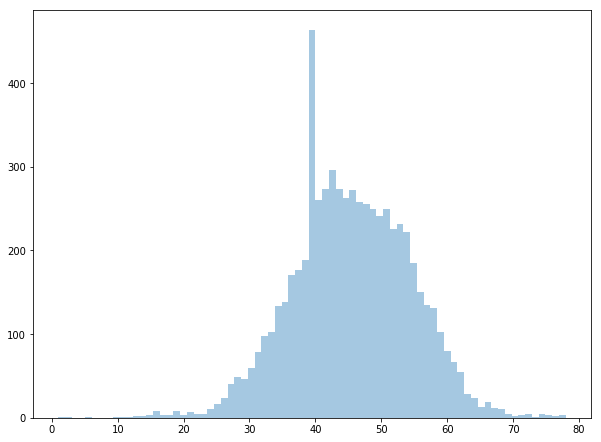

In [12]:
# Kicked Distance Distribution
fig = plt.figure(figsize=(10, 7.5))
sns.distplot(play_info['punt_dist'][play_info['punt_dist'] > 0].values, kde=False, bins=75)

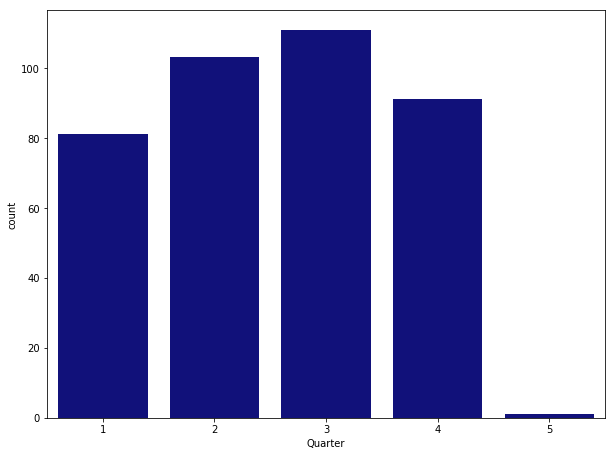

In [13]:
# Number of concussions per game quarter
fig = plt.figure(figsize=(10, 7.5))
sns.countplot(x='Quarter', data=play_info[play_info['concussion'] == True], color='darkblue')

In [14]:
# Number of concussions versus game start time
game_data['Game_Start_Hour'] = game_data['Start_Time'].str.split(':').map(lambda x: x[0])
game_data.head()

,GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,HomeTeamCode,Visit_Team,VisitTeamCode,Stadium,StadiumType,Turf,GameWeather,Temperature,OutdoorWeather,concussion,Game_Start_Hour
0,1,2016,Pre,1,2016-08-07 00:00:00.000,Sunday,Indianapolis,20:00,Indianapolis Colts,IND,Green Bay Packers,GB,Tom Benson Hall of Fame Stadium,Outdoor,Turf,NaN,NaN,NaN,False,20
1,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,LA,Dallas Cowboys,DAL,Los Angeles Memorial Coliseum,Outdoor,Grass,Sunny,79.0,Sunny,False,17
2,3,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Baltimore,19:30,Baltimore Ravens,BLT,Carolina Panthers,CAR,M&T Bank Stadium,Outdoor,Natural Grass,Party Cloudy,94.0,Partly Cloudy,False,19
3,4,2016,Pre,2,2016-08-12 00:00:00.000,Friday,Green Bay,19:00,Green Bay Packers,GB,Cleveland Browns,CLV,Lambeau Field,Outdoor,DD GrassMaster,NaN,73.0,NaN,False,19
4,5,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Chicago,19:00,Chicago Bears,CHI,Denver Broncos,DEN,Soldier Field,Outdoor,Grass,"Partly Cloudy, Chance of Rain 80%",88.0,NaN,True,19


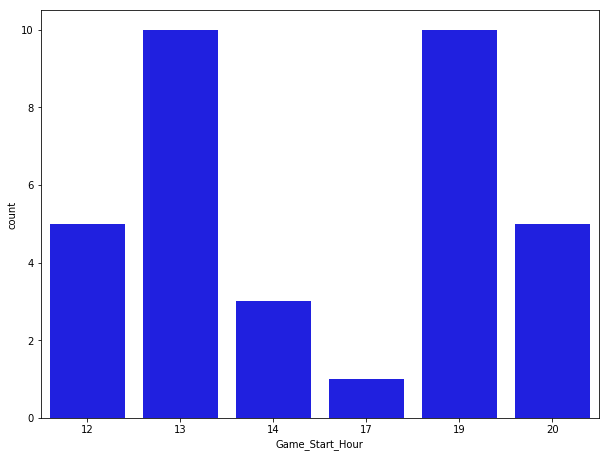

In [15]:
fig = plt.figure(figsize=(10, 7.5))
sns.countplot(x='Game_Start_Hour', data=game_data[game_data['concussion'] == True], color='blue')

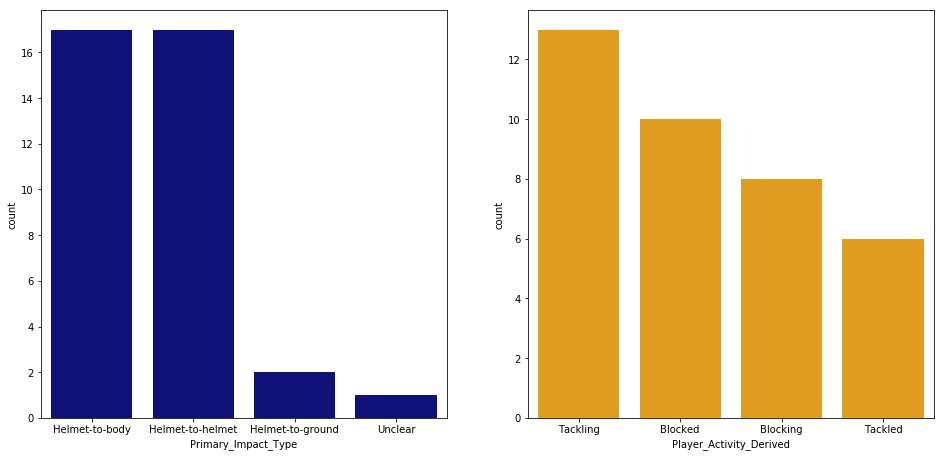

In [16]:
# Impact type and activity during impact
fig, ax = plt.subplots(1, 2, figsize=(16, 7.5))
sns.countplot(x='Primary_Impact_Type', data=video_review, color="darkblue", ax=ax[0])
sns.countplot(x='Player_Activity_Derived', data=video_review, color="orange", ax=ax[1])

In [17]:
# Type of game surface
set(game_data['Turf'].values)

{'A-Turf Titan',
 'Artifical',
 'Artificial',
 'AstroTurf GameDay Grass 3D',
 'DD GrassMaster',
 'Field Turf',
 'Field turf',
 'FieldTurf',
 'FieldTurf 360',
 'FieldTurf360',
 'Grass',
 'Natrual Grass',
 'Natural',
 'Natural Grass',
 'Natural Grass ',
 'Natural grass',
 'Naturall Grass',
 'Synthetic',
 'Turf',
 'UBU Speed Series S5-M',
 'UBU Speed Series-S5-M',
 'UBU Sports Speed S5-M',
 'grass',
 nan}

In [18]:
rep = {
    'Nat': 'Grass',
    'Grass': 'Grass',
    'gras': 'Grass',
    'Arti': 'Artificial',
    'Turf': 'Turf',
    'turf': 'Turf',
    'UBU': 'Ubu Speed',
    'Synthetic': 'Synthetic'
}

clean_turf = np.array([], str)

for value in game_data['Turf'].values:
    for k in list(rep.keys()):
        if isinstance(value, str) and k in value:
            clean_turf = np.append(clean_turf, rep[k])
            break
        elif value is np.nan:
            clean_turf = np.append(clean_turf, np.nan)
            break
            
len(clean_turf)


666

In [19]:
game_data['clean_turf'] = clean_turf

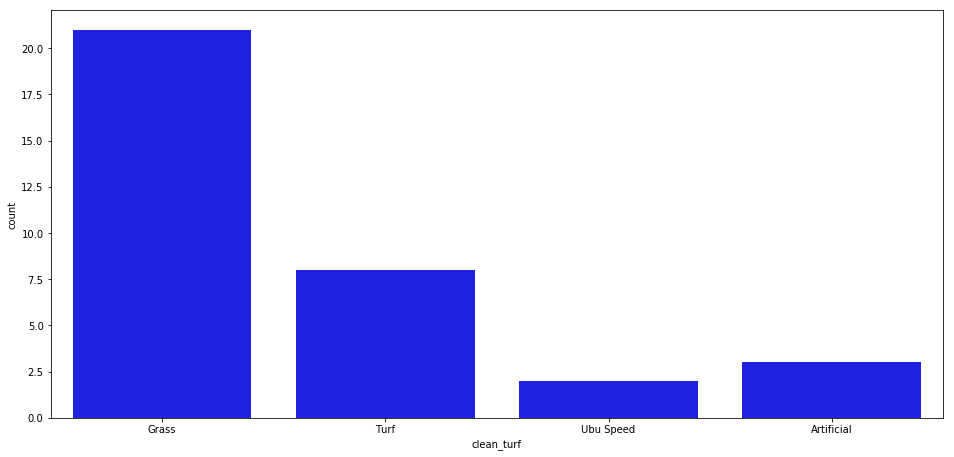

In [20]:
fig = plt.figure(figsize=(16, 7.5))
sns.countplot(x='clean_turf', data=game_data[game_data['concussion'] == True], color='blue')

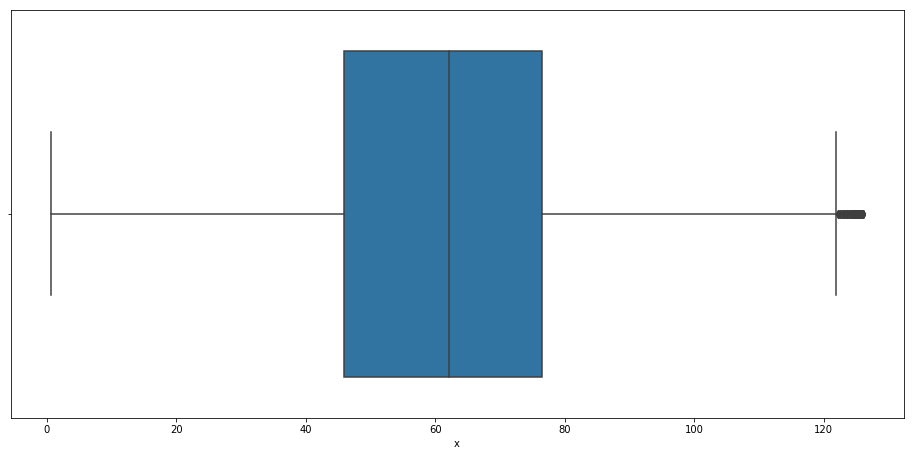

In [21]:
# Explore where concussions occur
plt.figure(figsize=(16, 7.5))
sns.boxplot(x=ngs_reg_2017[ngs_reg_2017['concussion'] == True]['x'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


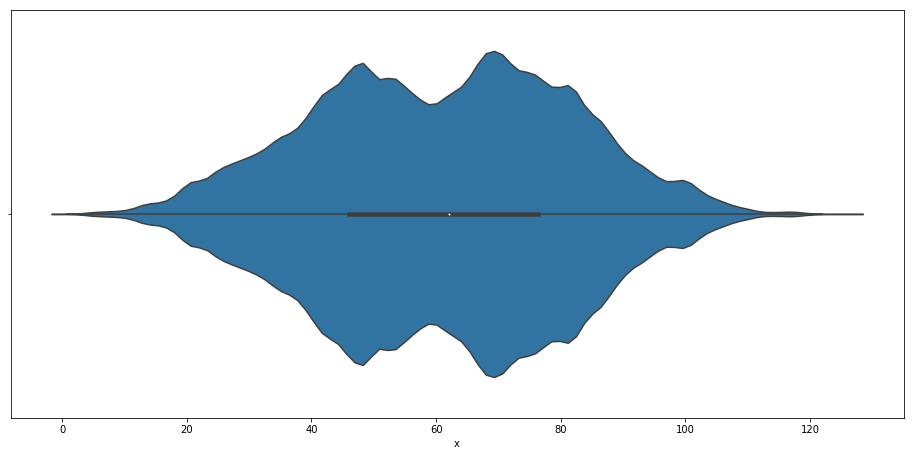

In [22]:
plt.figure(figsize=(16, 7.5))
sns.violinplot(x=ngs_reg_2017[ngs_reg_2017['concussion'] == True]['x'])

In [23]:
# Which player role suffers the most?

import squarify

player_role['concussion'] = player_role['concussion'].replace([True, False], [1, 0])
pr = player_role.groupby(['Role'], as_index=False).agg({'concussion': 'sum'})
pr.sort_values(by=['concussion'], inplace=True, ascending=False)
pr

,Role,concussion
42,PR,391
8,PDL1,388
45,PRW,387
43,PRG,387
22,PLG,386
34,PLT,386
35,PLW,386
6,P,386
16,PDR2,386
9,PDL2,386


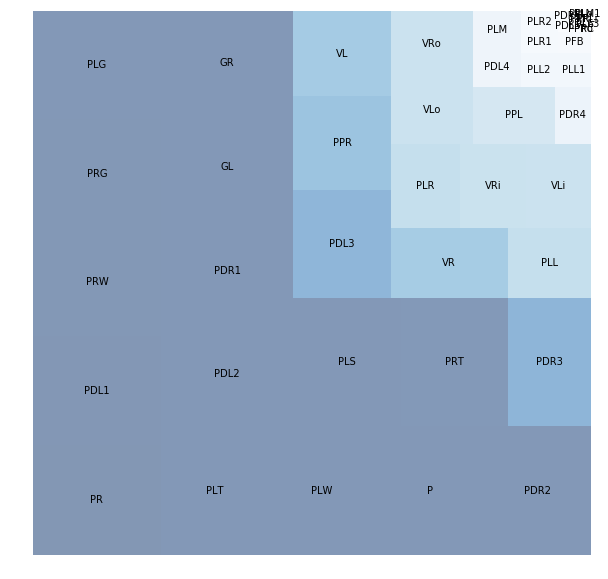

In [24]:
cmap = matplotlib.cm.Blues
my_values = pr[pr['concussion'] != 0]['concussion']
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

plt.figure(figsize=(10, 10))
squarify.plot(sizes=pr[pr['concussion'] != 0]['concussion'], label=pr['Role'], alpha=0.5, color=colors)
plt.axis('off')
plt.show()

# 3. Multivariate Analysis

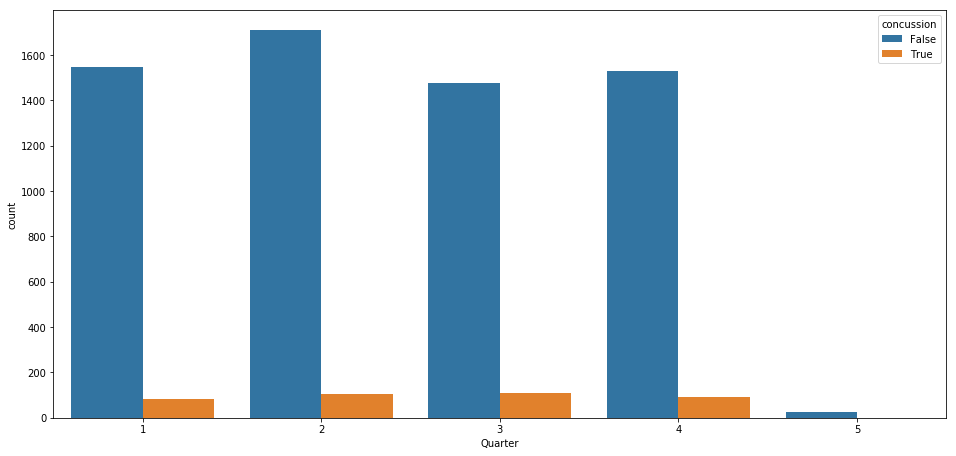

In [25]:
# Compare the number of plays of each quarter with the number of concussions that happened
fig = plt.figure(figsize=(16, 7.5))
sns.countplot(x='Quarter', hue='concussion', data=play_info)

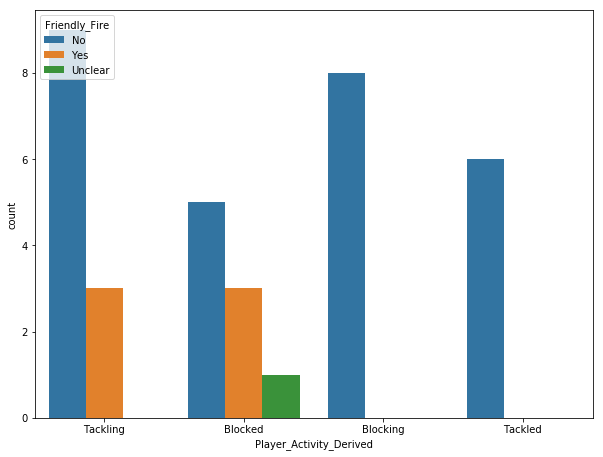

In [26]:
# How many where due to friendly fire?
fig = plt.figure(figsize=(10, 7.5))
ax = sns.countplot(x='Player_Activity_Derived', hue='Friendly_Fire', data=video_review)

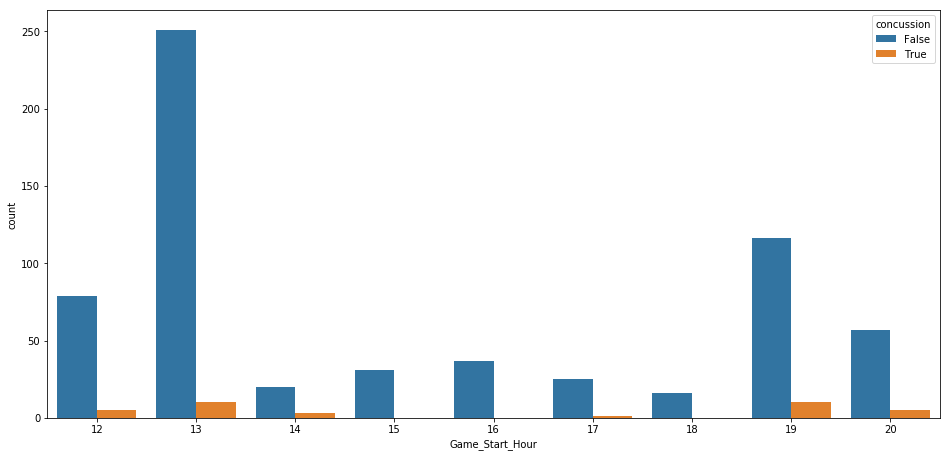

In [27]:
# Compare concussion number with the number of games that started at certain start hour
fig = plt.figure(figsize=(16, 7.5))
sns.countplot(x='Game_Start_Hour', data=game_data, hue='concussion')

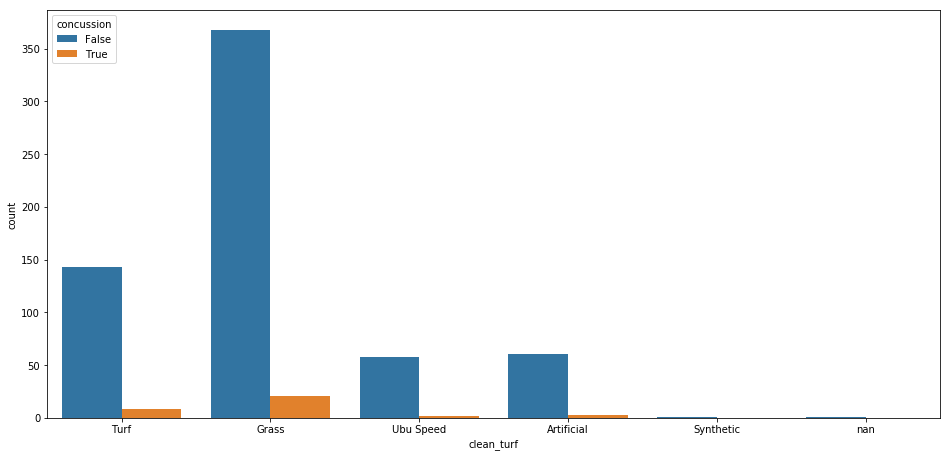

In [28]:
# Having insight about the game surface and the concussion proportion
fig = plt.figure(figsize=(16, 7.5))
sns.countplot(x='clean_turf', data=game_data, hue='concussion')

In [29]:
surface_proportion = game_data.groupby(['clean_turf', 'concussion']).agg({'GameKey': 'count'})
surface_proportion

GameKey
clean_turf concussion         
Artificial False            61
           True              3
Grass      False           368
           True             21
Synthetic  False             1
Turf       False           143
           True              8
Ubu Speed  False            58
           True              2
nan        False             1

In [30]:
surface_proportion.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

GameKey
clean_turf concussion            
Artificial False        95.312500
           True          4.687500
Grass      False        94.601542
           True          5.398458
Synthetic  False       100.000000
Turf       False        94.701987
           True          5.298013
Ubu Speed  False        96.666667
           True          3.333333
nan        False       100.000000

In [31]:
# Heatmap of the number of concussions at certain game
set(ngs_reg_2017[ngs_reg_2017['concussion'] == True]['GameKey'])

{399, 414, 448, 473, 506, 553, 567, 585, 601, 607, 618}

In [32]:
hm = ngs_reg_2017[ngs_reg_2017['GameKey'] == 473]
hm = hm[['x', 'y', 'concussion']]
hm['x'] = hm['x'].astype(int).astype('category')
hm['y'] = hm['y'].astype(int).astype('category')
hm.head()

,x,y,concussion
4450775,31,20,True
4450776,36,39,True
4450777,32,23,True
4450778,41,8,True
4450779,32,24,True


In [33]:
hm['concussion'] = hm['concussion'].replace([True, False], [1, 0])
hm.head()

,x,y,concussion
4450775,31,20,1
4450776,36,39,1
4450777,32,23,1
4450778,41,8,1
4450779,32,24,1


In [34]:
hm = hm.groupby(['x', 'y'], as_index=False).agg({'concussion': 'sum'})
hm

,x,y,concussion
0,10,1,11
1,11,1,10
2,11,2,5
3,11,3,2
4,11,5,6
5,11,6,7
6,11,7,4
7,11,8,3
8,12,1,7
9,12,2,3


In [35]:
hm = hm.pivot('y', 'x', 'concussion')
hm = hm.fillna(0)
hm

x,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,0.0,0.0,0.0
-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,18.0,8.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,...,0.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0
-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,6.0,6.0,8.0,8.0,5.0,6.0,6.0,0.0,0.0,0.0,0.0,2.0,6.0,5.0,6.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,...,3.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,6.0,5.0,6.0,0.0,3.0,5.0,6.0,6.0,6.0,6.0,2.0,0.0,0.0,4.0,16.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,7.0,4.0,0.0,0.0,0.0,1.0,2.0,5.0,6.0,7.0,9.0,7.0,4.0,0.0,0.0,0.0,9.0,5.0,2.0,9.0,8.0,1.0,12.0,41.0,11.0,20.0,11.0,25.0,28.0,7.0,18.0,...,41.0,77.0,99.0,68.0,32.0,41.0,8.0,17.0,2.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,7.0,0.0,0.0,0.0,0.0,2.0,6.0,9.0,7.0,9.0,2.0,0.0,0.0,0.0
1,11.0,10.0,7.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,3.0,7.0,2.0,2.0,0.0,4.0,0.0,13.0,12.0,3.0,5.0,10.0,4.0,11.0,4.0,3.0,14.0,10.0,15.0,4.0,8.0,20.0,1.0,6.0,12.0,3.0,...,24.0,31.0,28.0,19.0,16.0,19.0,13.0,10.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,7.0,10.0,0.0,0.0,0.0,0.0


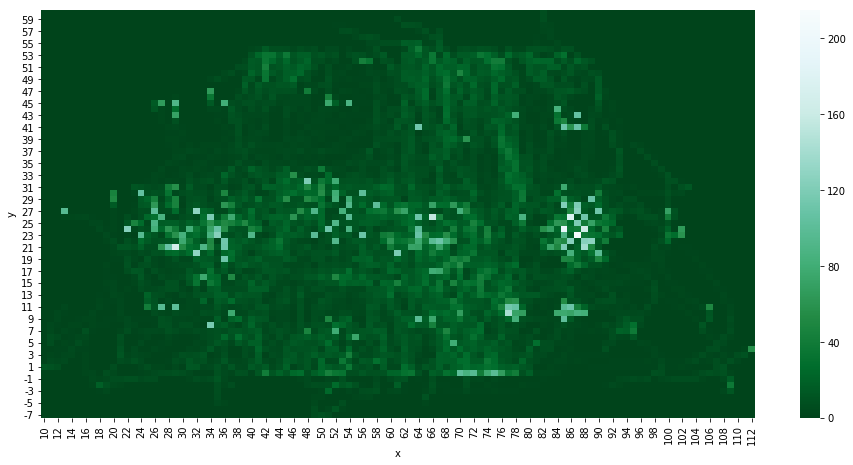

In [36]:
fig = plt.figure(figsize=(16, 7.5))
ax = sns.heatmap(hm, cmap='BuGn_r')
ax.invert_yaxis()